# 공공데이터 분석 1

### 학습 목표
- Jupyter Notebook 환경에서 Pandas와 Matplotlib 라이브러리를 활용하여 공공 데이터를 분석
- 서울시 CCTV 설치 현황 데이터와 인구 통계 데이터를 분석

### 사용 데이터
#### 서울시 자치구 년도별 CCTV 설치 현황
- https://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do

#### 서울시 주민등록인구 (구별) 통계
- https://data.seoul.go.kr/dataList/419/S/2/datasetView.do

공공데이터 파일(CSV)을 읽기 위해 Pandas 라이브러리를 불러옴.

Pandas 라이브러리에서 read_excel 함수를 이용하여 excel 파일을 읽을 수 있음.

또한, head 함수를 통해 excel 파일이 제대로 읽혔는지 확인.

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


Columns 속성을 통해 불러온 excel 파일의 데이터 확인

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

기관명 코드를 보다 적합하게 지역구로 컬럼의 이름을 변경

또한, head 함수를 통해 변경 확인

,지역구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


결측치를 확인해준다

컬럼별 정보 확인

In [ ]:
col_names = df.columns[~df.columns.isin(['지역구','2013년'])]
col_names

In [ ]:
for col in col_names:
    df[col] = df[col].str.replace(',', '')
    
df

,지역구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944,195,316,430,546,765,577,448
1,강동구,1879,303,387,134,59,144,194,273,385
2,강북구,1265,243,88,141,74,145,254,1,319
3,강서구,1617,219,155,118,230,187,190,264,254
4,관악구,3985,430,56,419,487,609,619,694,671
5,광진구,1581,470,42,83,87,64,21,468,346
6,구로구,3227,852,219,349,187,268,326,540,486
7,금천구,1634,27,17,242,101,382,136,199,530
8,노원구,1906,481,117,203,80,461,298,110,156
9,도봉구,858,197,66,8,185,59,155,117,71


CCTV 설치 현황 데이터와 동일하게 서울시 인구 통계 정보 데이터도 읽어옴.

서울시 인구 통계 정보는 txt 파일이며, read_csv 함수를 이용함.
> 데이터가 ','가 아닌 다른 문자로 구분되어있는지 확인이 필요하다.

head 함수를 통해 해당 파일이 정상적으로 불러왔는지 확인

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.2/4,합계,"4,384,076","9,985,652","4,859,501","5,126,151","9,720,846","4,732,275","4,988,571","264,806","127,226","137,580",2.22,"1,534,957"
3,2020.2/4,종로구,"74,497","160,520","77,745","82,775","150,383","73,288","77,095","10,137","4,457","5,680",2.02,"28,203"
4,2020.2/4,중구,"63,354","136,030","66,545","69,485","126,092","61,697","64,395","9,938","4,848","5,090",1.99,"24,035"


데이터가 정상적으로 불러왔으나 몇가지 문제점이 존재

- 열의 이름이 3행에 걸쳐 작성되어 있음
- 1(자치구), 3(합계), 6(한국인), 9(외국인), 13(고령자) 열만 필요

따라서 read_csv 함수의 옵션을 이용하여 원하는 데이터 프레임 형식으로 파일을 읽음

,자치구,계,계.1,계.2,65세이상고령자
0,합계,"9,985,652","9,720,846","264,806","1,534,957"
1,종로구,"160,520","150,383","10,137","28,203"
2,중구,"136,030","126,092","9,938","24,035"
3,용산구,"245,362","229,431","15,931","39,650"
4,성동구,"304,851","297,397","7,454","45,005"


원하는 데이터 프레임 형식으로 파일이 읽어 왔으나 열의 이름을 알아보는데 문제가 발생

따라서, 열의 이름을 변경

,지역구,인구수,한국인,외국인,고령자
0,합계,"9,985,652","9,720,846","264,806","1,534,957"
1,종로구,"160,520","150,383","10,137","28,203"
2,중구,"136,030","126,092","9,938","24,035"
3,용산구,"245,362","229,431","15,931","39,650"
4,성동구,"304,851","297,397","7,454","45,005"


데이터 프레임 함수인 sort_values 함수를 통해 CCTV 설치 하위 5개 구와 상위 5개 구를 확인

,지역구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197,66,8,185,59,155,117,71
24,중랑구,1068,0,0,0,770,102,121,66,9
2,강북구,1265,243,88,141,74,145,254,1,319
22,종로구,1471,8,7,599,132,195,148,281,101
23,중구,1544,25,165,114,80,245,270,317,328


,지역구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944,195,316,430,546,765,577,448
4,관악구,3985,430,56,419,487,609,619,694,671
6,구로구,3227,852,219,349,187,268,326,540,486
16,성북구,3003,779,84,304,241,279,388,285,643
21,은평구,2962,1365,83,99,343,180,296,229,367


인구 비율에 따른 CCTV 설치 수를 계산하기 위해 외국인컬럼, 고령자컬럼, 인구수컬럼을 정수타입으로변경

그 후 인구 비율을 계산 하여 새로운 열을 생성

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
지역구    26 non-null object
인구수    26 non-null object
한국인    26 non-null object
외국인    26 non-null object
고령자    26 non-null object
dtypes: object(5)
memory usage: 1.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
지역구    26 non-null object
인구수    26 non-null int32
한국인    26 non-null int32
외국인    26 non-null int32
고령자    26 non-null int32
dtypes: int32(4), object(1)
memory usage: 752.0+ bytes


In [16]:
# 외국인, 고령자의 인구 비율을 계산해서 추가
people['외국인비율'] = people['외국인'] / people['인구수'] * 100
people['고령자비율'] = people['고령자'] / people['인구수'] * 100
people.head()

,지역구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,9985652,9720846,264806,1534957,2.651865,15.371625
1,종로구,160520,150383,10137,28203,6.315101,17.569773
2,중구,136030,126092,9938,24035,7.305741,17.668897
3,용산구,245362,229431,15931,39650,6.492855,16.159797
4,성동구,304851,297397,7454,45005,2.445129,14.762950


불필요한 행(합계)를 drop 함수를 통해 제거
inplace 옵션이 True인 경우 원본 데이터 프레임 내부에서 삭제
inplace 옵션이 False인 경우 해당 열을 제거한 새로운 데이터 프레임을 반환

,지역구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,160520,150383,10137,28203,6.315101,17.569773
2,중구,136030,126092,9938,24035,7.305741,17.668897
3,용산구,245362,229431,15931,39650,6.492855,16.159797
4,성동구,304851,297397,7454,45005,2.445129,14.762950
5,광진구,363925,349574,14351,49457,3.943395,13.589888


외국인 비율의 상위 5개 구와 하위 5개 구를 확인

,지역구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
10,도봉구,331744,329560,2184,60784,0.658339,18.322562
11,노원구,533041,528887,4154,83636,0.779302,15.690350
15,양천구,462034,457953,4081,63824,0.883268,13.813702
23,강남구,546158,541233,4925,73097,0.901754,13.383856
12,은평구,483938,479524,4414,83272,0.912100,17.207163


,지역구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,405154,373349,31805,60071,7.850101,14.826708
2,중구,136030,126092,9938,24035,7.305741,17.668897
18,금천구,250554,232250,18304,38950,7.305411,15.545551
17,구로구,436707,405075,31632,68280,7.243300,15.635197
3,용산구,245362,229431,15931,39650,6.492855,16.159797


CCTV와 인구 통계 데이터 결합

,지역구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944,195,316,430,546,765,577,448,546158,541233,4925,73097,0.901754,13.383856
1,강동구,1879,303,387,134,59,144,194,273,385,461547,457164,4383,67742,0.949632,14.677162
2,강북구,1265,243,88,141,74,145,254,1,319,315395,311773,3622,62338,1.148401,19.765057
3,강서구,1617,219,155,118,230,187,190,264,254,593203,586936,6267,87032,1.056468,14.671537
4,관악구,3985,430,56,419,487,609,619,694,671,516318,499740,16578,77341,3.210812,14.979334


필요 없는 열을 삭제

,지역구,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,546158,541233,4925,73097,0.901754,13.383856
1,강동구,1879,461547,457164,4383,67742,0.949632,14.677162
2,강북구,1265,315395,311773,3622,62338,1.148401,19.765057
3,강서구,1617,593203,586936,6267,87032,1.056468,14.671537
4,관악구,3985,516318,499740,16578,77341,3.210812,14.979334


이후, 재구현성을 위해 가공이 완료된 데이터 프레임을 저장함.

지역구별 CCTV 설치수와 인구수, 외국인 비율, 고령자 비율의 상관 관계 계산

상관 계수 계산은 DataFrame의 corr 함수 사용

array([[ 1.        , -0.44976663],
       [-0.44976663,  1.        ]])

In [26]:
import matplotlib.pyplot as plt

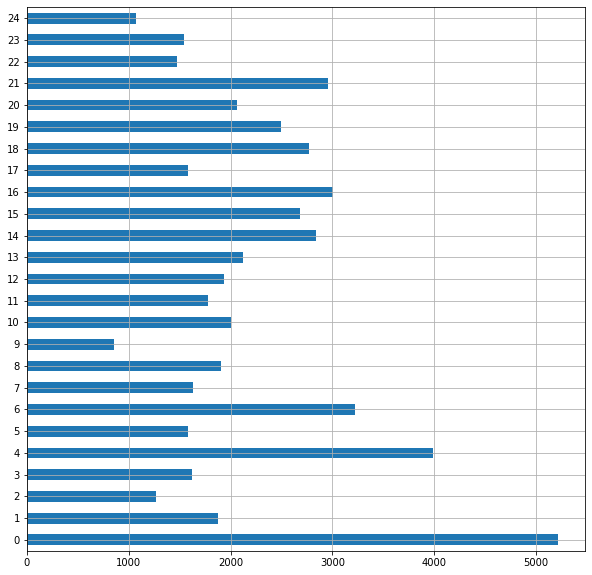

Y축의 Index 확인의 어려움이 존재 

따라서 데이터 프레임의 Index를 지역구로 변경

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
지역구,,,,,,,
강남구,5221,546158,541233,4925,73097,0.901754,13.383856
강동구,1879,461547,457164,4383,67742,0.949632,14.677162
강북구,1265,315395,311773,3622,62338,1.148401,19.765057
강서구,1617,593203,586936,6267,87032,1.056468,14.671537
관악구,3985,516318,499740,16578,77341,3.210812,14.979334


이후, Matplotlib로 재 시각화
Matplotlib에서 한글을 사용할 경우 에러가 발생 할 수 있음.
따라서, Font를 설정

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

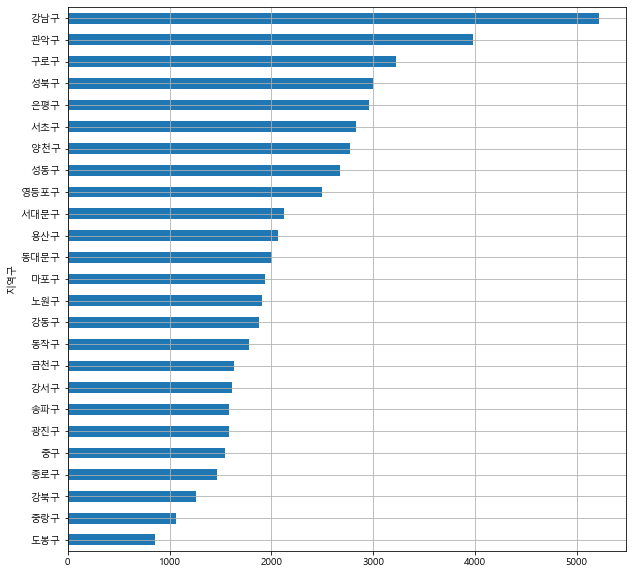

인구수와 CCTV 설치 수를 통해 인구수 대비 CCTV 비율을 계산 및 시각화

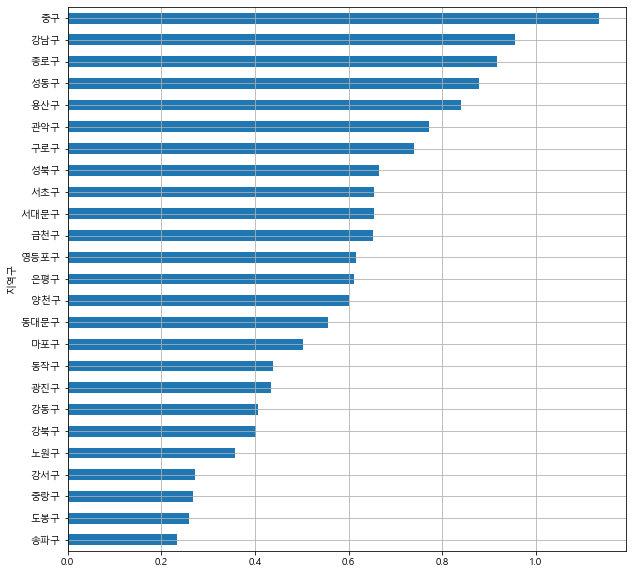

# 공공데이터 분석 2

### 학습 목표

서울시 범죄 통계 데이터와 인구 통계 데이터를 분석

### 사용 데이터

서울시 범죄 통계 데이터

- https://data.seoul.go.kr/dataList/316/S/2/datasetView.do

서울시 인구 통계 데이터

서울열린데이터광장에서 제공하는 서울시 5대 범죄 발행 현황 통계데이터를 다운로드

다운로드한 파일을 Pandas 라이브러리를 이용하여 불러옴

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2018,합계,"101,948","74,487",143,139,143,151,"6,412","6,046","39,175","19,762","56,075","48,389"
2,2018,종로구,"3,690","3,913",6,7,3,7,236,"1,100","1,483",969,"1,962","1,830"
3,2018,중구,"4,030","2,679",2,2,11,11,207,115,"1,855",832,"1,955","1,719"
4,2018,용산구,"3,411","2,543",1,1,3,2,331,285,"1,096",522,"1,980","1,733"


인구 통계 데이터와 동일하게 불필요한 열을 제외하고 원하는 데이터만 불러옴

또한 drop 함수를 이용하여 불필요한 행 제거 및 열 이름 변경

,자치구,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,합계,143,139,143,151,"6,412","6,046","39,175","19,762","56,075","48,389"
2,종로구,6,7,3,7,236,"1,100","1,483",969,"1,962","1,830"
3,중구,2,2,11,11,207,115,"1,855",832,"1,955","1,719"
4,용산구,1,1,3,2,331,285,"1,096",522,"1,980","1,733"


불필요한 행 제거 및 열 이름 재설정
- 열 이름 : ['지역구', '살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간강제추행 발생', '강간강제추행 검거','절도 발생','절도 검거','폭력 발생','폭력 검거']

,지역구,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
2,종로구,6,7,3,7,236,"1,100","1,483",969,"1,962","1,830"
3,중구,2,2,11,11,207,115,"1,855",832,"1,955","1,719"
4,용산구,1,1,3,2,331,285,"1,096",522,"1,980","1,733"
5,성동구,2,2,5,8,126,102,999,487,"1,325","1,188"
6,광진구,7,5,2,1,229,184,"1,769",974,"1,908","1,625"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 2 to 26
Data columns (total 11 columns):
지역구          25 non-null object
살인 발생        25 non-null object
살인 검거        25 non-null object
강도 발생        25 non-null object
강도 검거        25 non-null object
강간강제추행 발생    25 non-null object
강간강제추행 검거    25 non-null object
절도 발생        25 non-null object
절도 검거        25 non-null object
폭력 발생        25 non-null object
폭력 검거        25 non-null object
dtypes: object(11)
memory usage: 2.3+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 2 to 26
Data columns (total 11 columns):
지역구          25 non-null object
살인 발생        25 non-null int32
살인 검거        25 non-null int32
강도 발생        25 non-null int32
강도 검거        25 non-null int32
강간강제추행 발생    25 non-null int32
강간강제추행 검거    25 non-null int32
절도 발생        25 non-null int32
절도 검거        25 non-null int32
폭력 발생        25 non-null int32
폭력 검거        25 non-null int32
dtypes: int32(10), object(1)
memory usage: 1.4+ KB


데이터 프레임 기초 통계 분석

,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,5.720000,5.560000,5.720000,6.040000,256.480000,241.840000,1567.000000,790.480000,2243.000000,1935.560000
std,3.668787,3.465064,3.102687,3.457841,122.166594,204.962127,505.650818,219.378121,600.349829,504.729142
min,1.000000,1.000000,1.000000,1.000000,113.000000,102.000000,781.000000,431.000000,1325.000000,1124.000000
25%,3.000000,3.000000,3.000000,3.000000,183.000000,140.000000,1164.000000,603.000000,1912.000000,1685.000000
50%,5.000000,5.000000,5.000000,6.000000,207.000000,181.000000,1483.000000,816.000000,2115.000000,1871.000000
75%,8.000000,7.000000,7.000000,8.000000,309.000000,267.000000,1851.000000,969.000000,2619.000000,2229.000000
max,17.000000,15.000000,14.000000,14.000000,600.000000,1100.000000,3004.000000,1317.000000,3885.000000,3333.000000


검거 횟수와 발생 횟수를 이용하여 검거율 계산

,지역구,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,강간강제추행 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율
2,종로구,6,7,3,7,236,1100,1483,969,1962,1830,466.101695,233.333333,116.666667,65.340526,93.272171
3,중구,2,2,11,11,207,115,1855,832,1955,1719,55.555556,100.000000,100.000000,44.851752,87.928389
4,용산구,1,1,3,2,331,285,1096,522,1980,1733,86.102719,66.666667,100.000000,47.627737,87.525253
5,성동구,2,2,5,8,126,102,999,487,1325,1188,80.952381,160.000000,100.000000,48.748749,89.660377
6,광진구,7,5,2,1,229,184,1769,974,1908,1625,80.349345,50.000000,71.428571,55.059356,85.167715


검거율이 100%를 초과하는 경우 100으로 치환

,지역구,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,강간강제추행 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율
2,종로구,6,7,3,7,236,1100,1483,969,1962,1830,100.000000,100.000000,100.000000,65.340526,93.272171
3,중구,2,2,11,11,207,115,1855,832,1955,1719,55.555556,100.000000,100.000000,44.851752,87.928389
4,용산구,1,1,3,2,331,285,1096,522,1980,1733,86.102719,66.666667,100.000000,47.627737,87.525253
5,성동구,2,2,5,8,126,102,999,487,1325,1188,80.952381,100.000000,100.000000,48.748749,89.660377
6,광진구,7,5,2,1,229,184,1769,974,1908,1625,80.349345,50.000000,71.428571,55.059356,85.167715


불필요한 열 제거

,지역구,살인 발생,강도 발생,강간강제추행 발생,절도 발생,폭력 발생,강간강제추행 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율
2,종로구,6,3,236,1483,1962,100.000000,100.000000,100.000000,65.340526,93.272171
3,중구,2,11,207,1855,1955,55.555556,100.000000,100.000000,44.851752,87.928389
4,용산구,1,3,331,1096,1980,86.102719,66.666667,100.000000,47.627737,87.525253
5,성동구,2,5,126,999,1325,80.952381,100.000000,100.000000,48.748749,89.660377
6,광진구,7,2,229,1769,1908,80.349345,50.000000,71.428571,55.059356,85.167715


열 이름 재 정리 및 Index 재설정 

,살인,강도,강간,절도,폭력,강간강제추행 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율
지역구,,,,,,,,,,
종로구,6,3,236,1483,1962,100.000000,100.000000,100.000000,65.340526,93.272171
중구,2,11,207,1855,1955,55.555556,100.000000,100.000000,44.851752,87.928389
용산구,1,3,331,1096,1980,86.102719,66.666667,100.000000,47.627737,87.525253
성동구,2,5,126,999,1325,80.952381,100.000000,100.000000,48.748749,89.660377
광진구,7,2,229,1769,1908,80.349345,50.000000,71.428571,55.059356,85.167715


Scikit Learn 라이브러리에 존재하는 정규화 함수를 이용하여 정규화 진행
> 정규화 : 0~1사이의 값으로 변경

In [43]:
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_norm = pd.DataFrame(x_scaled, columns = col, index = crime.index)

col2 = ['강간강제추행 검거율', '강도 검거율', '살인 검거율', '절도 검거율', '폭력 검거율']
crime_norm[col2] = crime[col2]
crime_norm.head()

,강간,강도,살인,절도,폭력,강간강제추행 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율
지역구,,,,,,,,,,
종로구,0.252567,0.153846,0.3125,0.315789,0.248828,100.000000,100.000000,100.000000,65.340526,93.272171
중구,0.193018,0.769231,0.0625,0.483131,0.246094,55.555556,100.000000,100.000000,44.851752,87.928389
용산구,0.447639,0.153846,0.0000,0.141700,0.255859,86.102719,66.666667,100.000000,47.627737,87.525253
성동구,0.026694,0.307692,0.0625,0.098066,0.000000,80.952381,100.000000,100.000000,48.748749,89.660377
광진구,0.238193,0.076923,0.3750,0.444444,0.227734,80.349345,50.000000,71.428571,55.059356,85.167715


범죄 열 생성

In [44]:
col = ['강간','강도','살인','절도','폭력']


,강간,강도,살인,절도,폭력,강간강제추행 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,범죄
지역구,,,,,,,,,,,
종로구,0.252567,0.153846,0.3125,0.315789,0.248828,100.000000,100.000000,100.000000,65.340526,93.272171,1.283530
중구,0.193018,0.769231,0.0625,0.483131,0.246094,55.555556,100.000000,100.000000,44.851752,87.928389,1.753974
용산구,0.447639,0.153846,0.0000,0.141700,0.255859,86.102719,66.666667,100.000000,47.627737,87.525253,0.999045
성동구,0.026694,0.307692,0.0625,0.098066,0.000000,80.952381,100.000000,100.000000,48.748749,89.660377,0.494952
광진구,0.238193,0.076923,0.3750,0.444444,0.227734,80.349345,50.000000,71.428571,55.059356,85.167715,1.362295


검거 열 생성

In [45]:
col = ['강간강제추행 검거율','강도 검거율','살인 검거율','절도 검거율','폭력 검거율']


,강간,강도,살인,절도,폭력,강간강제추행 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,범죄,검거
지역구,,,,,,,,,,,,
종로구,0.252567,0.153846,0.3125,0.315789,0.248828,100.000000,100.000000,100.000000,65.340526,93.272171,1.283530,458.612697
중구,0.193018,0.769231,0.0625,0.483131,0.246094,55.555556,100.000000,100.000000,44.851752,87.928389,1.753974,388.335696
용산구,0.447639,0.153846,0.0000,0.141700,0.255859,86.102719,66.666667,100.000000,47.627737,87.525253,0.999045,387.922375
성동구,0.026694,0.307692,0.0625,0.098066,0.000000,80.952381,100.000000,100.000000,48.748749,89.660377,0.494952,419.361507
광진구,0.238193,0.076923,0.3750,0.444444,0.227734,80.349345,50.000000,71.428571,55.059356,85.167715,1.362295,342.004987


시각화를 위해 Matplotlib 라이브러리와 Seaborn 라이브러리를 불러옴

한글 사용을 위해 폰트 설정

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

Seaborn 라이브러리의 Pairplot 을 이용하여 강도, 살인, 폭력 시각화 

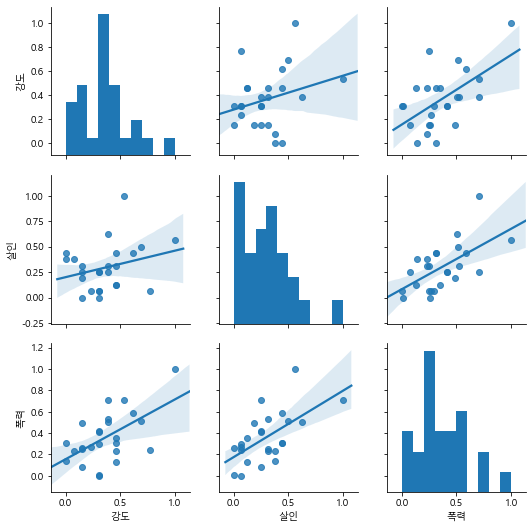

검거 열 정규화

,강간,강도,살인,절도,폭력,강간강제추행 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,범죄,검거
지역구,,,,,,,,,,,,
종로구,0.252567,0.153846,0.3125,0.315789,0.248828,100.000000,100.000000,100.0,65.340526,93.272171,1.283530,100.000000
은평구,0.154004,0.000000,0.4375,0.223572,0.308594,89.893617,100.000000,100.0,63.849765,88.368794,1.123670,96.402079
중랑구,0.125257,0.153846,0.1875,0.335133,0.490625,83.333333,100.000000,100.0,57.404980,84.967067,1.292361,92.824595
관악구,0.490760,0.692308,0.5000,0.553756,0.514844,86.647727,100.000000,100.0,50.944334,87.097995,2.751667,92.603205
금천구,0.178645,0.461538,0.3125,0.174089,0.229297,92.500000,85.714286,100.0,55.222603,90.219665,1.356069,92.377851


검거율 정보 시각화(Heatmap)

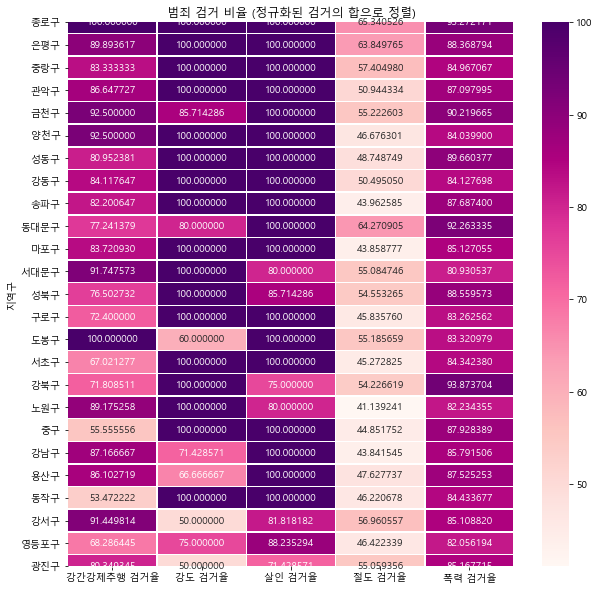